In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np

In [5]:
## para deixar as imagens maiores
#plt.rcParams['figure.figsize'] = [10, 5]

In [115]:
v = np.ones((30,50)) * 0.5

In [116]:
v[0,:]=1
v[-1,:]=1
v[:,0]=1
v[:,-1]=1

In [117]:
v[10:15,20:25] = 1

In [118]:
v[20:25,40:45] = 0

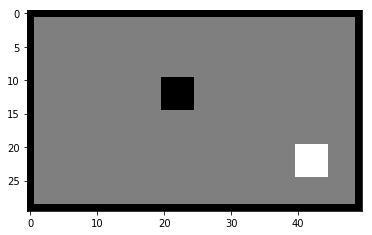

In [119]:
img = Image.fromarray(np.uint8((1-v) * 255) , 'L')
imshow(img)

In [120]:
h,w = v.shape
oldv = v.copy()
newv = v.copy()
for t in range(1000):
    updated=False
    for x in range(h):
        for y in range(w):
            if v[x,y] not in (0.,1.):
                if oldv[x,y] <= min(oldv[x-1,y],oldv[x+1,y],oldv[x,y-1],oldv[x,y+1]):
                    updated = True
                newv[x,y] = (oldv[x-1,y]+oldv[x+1,y]+oldv[x,y-1]+oldv[x,y+1])/4
    oldv=newv.copy()
    if not updated:
        break
print(t)

386


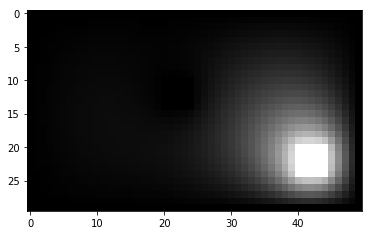

In [121]:
img = Image.fromarray(np.uint8((1-oldv) * 255) , 'L')
imshow(img)

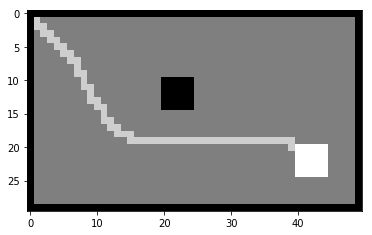

In [138]:
path = np.zeros(v.shape)
x,y = 1, 1
while v[x,y] != 0:
    path[x,y] = 1
    x,y = min((x-1,y), (x+1,y), (x,y-1), (x,y+1), key=lambda a:newv[a[0],a[1]])
img = Image.fromarray(np.uint8((1-(path*0.7 + v)) * 255) , 'L')
imshow(img)    

In [158]:
cost = np.ones((h,w))*1000
cost

pos = (10,10)
goal = (20,40)
for t in range(10):
    x,y = pos
    for x,y in [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]:
        if v[x,y] in [0,1]:
            cost[x,y] = v[x,y]
        if cost[x,y] == 1000:
            cost[x,y] = abs(goal[0]-x) + abs(goal[1]-y) # manhattan
        print(x,y , cost[x,y])
    x,y = min((x-1,y), (x+1,y), (x,y-1), (x,y+1), key=lambda a:cost[a[0], a[1]])
    pos = (x,y)
    print(999999999,x,y , cost[x,y])

9 10 41.0
11 10 39.0
10 9 41.0
10 11 39.0
999999999 9 11 1000.0
8 11 41.0
10 11 39.0
9 10 41.0
9 12 39.0
999999999 8 12 1000.0
7 12 41.0
9 12 39.0
8 11 41.0
8 13 39.0
999999999 7 13 1000.0
6 13 41.0
8 13 39.0
7 12 41.0
7 14 39.0
999999999 6 14 1000.0
5 14 41.0
7 14 39.0
6 13 41.0
6 15 39.0
999999999 5 15 1000.0
4 15 41.0
6 15 39.0
5 14 41.0
5 16 39.0
999999999 4 16 1000.0
3 16 41.0
5 16 39.0
4 15 41.0
4 17 39.0
999999999 3 17 1000.0
2 17 41.0
4 17 39.0
3 16 41.0
3 18 39.0
999999999 2 18 1000.0
1 18 41.0
3 18 39.0
2 17 41.0
2 19 39.0
999999999 1 19 1000.0
0 19 1.0
2 19 39.0
1 18 41.0
1 20 39.0
999999999 0 20 1000.0
